This project was made with a dataset from kaggle, The famous cats and dogs dataset to be precise.

[LINK TO DATASET](https://www.kaggle.com/c/dogs-vs-cats)

![Cat and dog jpeg](https://storage.googleapis.com/kaggle-competitions/kaggle/3362/media/woof_meow.jpg)



In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle competitions download -c dogs-vs-cats

 98% 793M/812M [00:03<00:00, 262MB/s]
100% 812M/812M [00:03<00:00, 277MB/s]


In [6]:
!unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [7]:
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

Now we have the dataset, the first thing we will have to do is to go through it .

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Dense,Flatten
from keras.models import Sequential
import tensorflow as tf


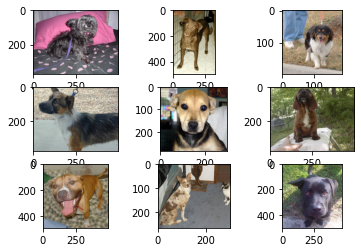

In [9]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'train/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'dog.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

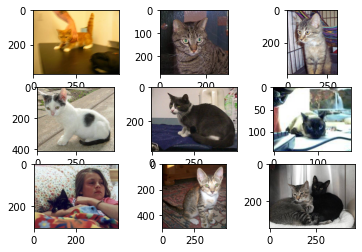

In [10]:
# plot cat photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'train/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'cat.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

**Validation splitting**


---


Here the data is split into training and validation sets i.e two different folders , the network is fitted onto the training data and its performance is checked using the test/validation set.

In [11]:
from random import random, seed
from os import makedirs, listdir
from shutil import copyfile
# create directories
dataset_home = 'dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['dogs/', 'cats/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)
  

# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = 'train/'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = 'train/'
	if random() < val_ratio:
		dst_dir = 'test/'
	if file.startswith('cat'):
		dst = dataset_home + dst_dir + 'cats/'  + file
		copyfile(src, dst)
	elif file.startswith('dog'):
		dst = dataset_home + dst_dir + 'dogs/'  + file
		copyfile(src, dst)

In [12]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.xception import preprocess_input

datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


In [13]:
# prepare iterators
train_it = datagen.flow_from_directory('dataset_dogs_vs_cats/train/',
	class_mode='binary', batch_size=64, target_size=(200, 200))
test_it = datagen.flow_from_directory('dataset_dogs_vs_cats/test/',
	class_mode='binary', batch_size=64, target_size=(200, 200))

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.


In [14]:

transfer_model = Sequential()

pretrained_model = keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(200,200,3),
    pooling='max',
)

for layer in pretrained_model.layers:
  layer.trainable = False


transfer_model.add(pretrained_model)
transfer_model.add(Flatten())
transfer_model.add(Dense(128,activation = 'relu'))
transfer_model.add(Dense(1, activation = 'sigmoid'))


# history = model.fit(train_it, steps_per_epoch=len(train_it),
#                               validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)

83697664/83683744 [==============================] - 0s 0us/step


In [15]:
transfer_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 21,123,881
Trainable params: 262,401
Non-trainable params: 20,861,480
_________________________________________________________________


In [16]:
transfer_model.compile(optimizer = 'adam',
                     loss = 'binary_crossentropy',
                     metrics = ['accuracy'])


In [17]:
network = transfer_model.fit(
    train_it,
    validation_data = test_it,
    epochs = 2,
    steps_per_epoch=len(train_it),
    validation_steps=len(test_it),
)



Epoch 1/2
293/293 [==============================] - 116s 339ms/step - loss: 0.0584 - accuracy: 0.9820 - val_loss: 0.0343 - val_accuracy: 0.9875
Epoch 2/2
293/293 [==============================] - 97s 331ms/step - loss: 0.0361 - accuracy: 0.9875 - val_loss: 0.0423 - val_accuracy: 0.9851


In [18]:
# evaluate model
_, acc = transfer_model.evaluate_generator(test_it, steps=len(test_it))
print('> %.3f' % (acc * 100.0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


> 98.509


In [19]:
!mkdir models/

In [20]:
transfer_model.save('models/cat_and_dog_classifier.h5')

Now, lets test our model on real world data

In [21]:
import PIL, cv2
from keras.preprocessing.image import load_img, img_to_array


def test_raw_image(image):
  # image  = load_img(image, target_size  = (200,200))
  # image = img_to_array(image)
  # image = image.reshape(1,200,200,3)
  image = cv2.imread(image)
  image = cv2.resize(image, (200,200))
  image = np.expand_dims(image, axis = 0)
  image = preprocess_input(image)
  prediction = transfer_model.predict(image)
  print(prediction)
  if prediction[0,0] >=0.5:
    result = 'dog'
  else:
    result = 'cat'
  
  return result





# DEPLOYMENT
> NOW, WE WILL DEPLOY THE WORKING MODEL TO PRODUCTION WITH THE HELP OF STREAMLIT OR ANY OTHER CLOUD ML DEPLOYMENT SERVICE



In [22]:
!pip install -q streamlit

     |████████████████████████████████| 9.1 MB 7.7 MB/s 
     |████████████████████████████████| 78 kB 8.5 MB/s 
     |████████████████████████████████| 4.3 MB 59.8 MB/s 
     |████████████████████████████████| 181 kB 73.1 MB/s 
     |████████████████████████████████| 164 kB 70.5 MB/s 
     |████████████████████████████████| 235 kB 78.5 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
     |████████████████████████████████| 132 kB 76.8 MB/s 
     |████████████████████████████████| 132 kB 76.6 MB/s 
     |████████████████████████████████| 793 kB 66.3 MB/s 
     |████████████████████████████████| 423 kB 73.8 MB/s 
     |████████████████████████████████| 381 kB 44.8 MB/s 
     |████████████████████████████████| 51 kB 9.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nbclient 0.6.6 requires traitlets>=5.2.2, but you have traitlets 5.1.1 which i

In [23]:
!pip install -qq pyngrok

     |████████████████████████████████| 745 kB 7.7 MB/s 


In [24]:
!ngrok authtoken 2C1mkdca2XH1kSAyffhHZxFlR7q_44v2jHRcG9j2mQCMnFqDU

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [25]:
from pyngrok import ngrok 
public_url = ngrok.connect(port='8501')
public_url

<NgrokTunnel: "http://c1f4-104-198-3-101.ngrok.io" -> "http://localhost:80">

In [26]:
%%writefile streamlit_app.py 
import streamlit as st 
st.markdown(""" This is a Streamlit App """)


Writing streamlit_app.py


In [27]:
!streamlit run /content/streamlit_app.py & npx localtunnel --port 8501

2022-07-21 18:24:27.922 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://104.198.3.101:8501

npx: installed 22 in 3.781s
  Stopping...
^C


## Using Git

In [28]:
!sudo apt install git

Reading package lists... Done
Building dependency tree       
Reading state information... Done
git is already the newest version (1:2.17.1-1ubuntu0.12).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [29]:
!git init
!git add cat_and_dog_classifier.h5

Initialized empty Git repository in /content/.git/
fatal: pathspec 'cat_and_dog_classifier.h5' did not match any files


In [30]:
!git status

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.config/
	dataset_dogs_vs_cats/
	dogs-vs-cats.zip
	kaggle.json
	models/
	sampleSubmission.csv
	sample_data/
	streamlit_app.py
	test1.zip
	train.zip
	train/

nothing added to commit but untracked files present (use "git add" to track)


In [31]:
!git remote add origin https://github.com/kalusam1/cat-and-dogs-classification

In [32]:
!git config --global user.email "kalusam619@gmail.com"

In [33]:
!git pull origin main --allow-unrelated-histories

remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 27 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (27/27), done.
From https://github.com/kalusam1/cat-and-dogs-classification
 * branch            main       -> FETCH_HEAD
 * [new branch]      main       -> origin/main
